# Machine Learning Mini Project

# 1 Author

**Student Name**: Pranav Rao

**Student ID**: 240837228



# 2 Problem formulation

Why do we lie? While humans are not the only species to demonstrate the capability to lie or deceive, there certainly is an argument that can be made for us being the best at it. There is a school of thought that mentions the Hedonic Tone in our heads. That is, whether we think we have a lot to gain from lying (positive tone) or we think we have a lot to lose by lying (negative tone). While the motivations behind why we lie are certainly fascinating, in this project, I want to focus less on why we lie and more on how to tell when we are lying. Traditionally, the methods to detect lies are cumbersome, expensive, and quite invasive. We hook up ECGs to track brain waves, pulse monitors to track heart rate, and observe nonverbal tells such as sweating, darting eyes, and general anxious behavior such as aggressive tapping of legs and shifty body language. However, what if there was a less invasive way to tell truths from lies? What if we could analyze speech patterns and features and use these features to build a machine learning model to accomplish this goal? In this project, this is what I will attempt to do. 

With this project, I would like to build a machine learning model that predicts whether a narrated story is true or false based on audio recordings of 30 seconds in duration. This task falls under the category of binary classification, where the two possible outcomes are “True” or “False.”

This will be a challenging and interesting task because it requires the integration of audio processing and machine learning techniques. Key aspects of the challenge include:
	
	1. Understanding Speech Features: Extracting meaningful features from audio recordings that encapsulate characteristics such as tone, pitch, pace, and other nuances that could indicate deception or truthfulness.

	2. Metadata Utilization: Leveraging attributes such as the language of the narration and the story type to enhance predictive accuracy.
	
	3. Scarce and Complex Data: With a dataset of only 100 samples, the project will require careful handling of the data and may require techniques like stratified k-fold cross validation, Principal Component Analysis (PCA), and proper hyperparamter tuning to overcome the limitations of sample size.

This project is also interesting because of its real world applications. The results of this project could have real-world applications in fields like forensic analysis, automated fact-checking, and content validation. Despite its difficulty, the problem is an excellent opportunity to explore the integration of audio signal processing and machine learning using a concise dataset. 

# 3 Methodology

#### Training Task

This is a supervised learning, binary classification problem. To train the model, I will use a Support Vector Machine (SVM). This should result in the model taking in an audio recording and predicting whether a narrated story is true or false. There are four key components to this process:

	1. Preprocessing: I will first need to ensure that the metadata matches the audio recordings in my dataset. Since this information is already provided to us, there is a certain degree of confidence that this will be the case. However, if I was less confident about the origin of the data, I would want to ensure that there is a relatively even distribution of true/false stories, the stories are all of similar lengths, the audio files are all sampled at the same rate (16kHz), and there is minimal to no background noise. For the metadata, I want to encode the categorical variables (true/false) into numerical variables.

	2. Feature Extraction: Once the data is through preprocessing, I will be using Python's librosa library to extract meaningful features from the audio recordings using signal processing techniques (ex: Mel-frequency cepstral coefficients (MFCCs), spectral features, pitch, tone, etc). Additionally, I will include metadata such as language and story type as input features.

	3. Data Splitting: For this project, I will be splitting the data into k-folds so that every fold is being used for training and validation. One of the main reasons for this is that I want to make the most use out of the dataset, given its relatively small size. I will be using a stratified splitting approach in order to ensure that true/false occurrences are split evenly among the training and validation folds. 

	4. Model Training: After preprocessing, feature extraction, and data splitting, I'm ready to train my model. Potential models include logistic regression, support vector machines (SVM), random forests, or deep learning models (ex: a simple feedforward neural network or convolutional models for audio data). I've decided to go with a SVM classifier for this project, noting the benefits of its strength in binary classification tasks, its ability to handle small to medium size datasets, and its ability to perform well with high dimensional datasets (many features). It also does a relatively decent job of avoiding overfitting, which given the small size of this dataset, is crucial. However, this approach does not come without its limitations. SVM will work fine for a small dataset such as this one, but for larger datasets, it can be very computationally expensive. If I ever want to retrain this model or revisit this project in the future with a larger dataset, I will need to keep this in mind. SVM is also quite sensitive to outliers. However, I think that will not be a problem here as the audio files we have collected for this dataset are relatively uniform and well organized. It also requires normalization of features and proper scaling to ensure any one feature doesn't dominate the others, so I will need to ensure that I use StandardScaler() in my implementation. Finally, SVM normally prefers clear distinction of classes. If feature extraction is not able to properly delineate between true and false narrations, this model may not perform well. That is, if the true stories are similar to the false stories from an audio perspective, this model may struggle to properly distinguish between them. 

#### Validation Task

Once the model has been trained, I will undertake the following validation steps to ensure that the model can perform well with new, unseen data.

	1. Validation Strategy: For my validation approach, I've opted for k-fold cross validation. I've chosen this approach because of the size of the dataset. I had originally considered going for a 70:15:15 split into training, validation, and test. However, due to the size of the dataset, I decided that this would not be enough. With k-fold cross validation, I can effectively use the entire dataset for training, leaving behind one for validation. Then, I can simply repeat this process for each fold. Moreover, I will be opting for a stratified k-fold approach, which will ensure that each fold is balanced with deceptive stories and true stories. I have also verified that the data points are independent of each other, which is crucial in order for k-fold cross validation to work properly. 

	2. Hyperparameter Tuning: I think some key hyperparameters to keep track of are the kernel, regularization parameter (C), and kernel coefficient (gamma). The kernel is essentially the lens the model uses to view the data. "C" tells the model how much it should focus on making the perfect prediction, with a low C allowing for a greater margin of error and a high C being more stringent (which comes with the risk of overfitting). Finally, the kernel coefficient (gamma) is how influential a single data point can be. Now that I have decided on my hyperparameters, I will set ranges for the model to explore, split the data into k-folds, evaluate all of the combinations of hyperparameter values, then use the best combination to train the final model. 

#### Model Performance Metrics

I will be using the following metrics to assess the performance of my model:

	1. Accuracy: Measures the proportion of correct predictions out of the total predictions. While accuracy provides a basic evaluation, it can be misleading in the presence of imbalanced classes. So, I will be incorporating additional metrics as well to get a better idea of the model's overall performance. 

	2. Confusion Matrix: Visualizes the performance by displaying the counts of true positives, false positives, true negatives, and false negatives. This helps to understand specific types of misclassification errors. In other words, I'll be able to see if the model potentially favors true stories more or deceptive stories more. 

	3. Precision, Recall, and F1-Score:
	• Precision will evaluate the accuracy of positive predictions.
	• Recall measures the ability of the model to identify all true positive instances.
	• F1-score provides a balance between precision and recall.
	
	4. ROC-AUC Score: Quantifies the model’s performance across various classification thresholds, providing insight into its ability to discriminate between classes.

# 4 Implemented ML prediction pipelines

My ML pipeline will consist of:

1. Data preprocessing and visualization: takes .wav files and metadata (csv format) as inputs, outputs audio signals and labels

2. Feature extraction: takes audio signals as inputs, outputs the feature matrix

3. Dimensionality reduction using PCA: takes the feature matrix as an input, outputs a feature matrix post-PCA

4. Model training using SVM with k-fold cross validation: takes the post-PCA feature matrix as an input, outputs a trained SVM model

5. Hyperparameter tuning: takes hyperparameters as an input, outputs the optimal combination of hyperparamaters for the model

6. Model evaluation: takes a test dataset and a trained model as inputs, outputs model metrics and relevant visualizations

This pipeline should be able to use audio inputs and provided metadata to provide a determination on whether a narrated story is true or false. I will start with data preprocessing. Thankfully, some of this work is already done for me because we recorded our audio in similar, standardized ways. Once this is complete, I will move into the transformation stage, where I will do some feature extraction and perhaps some metadata encoding. Once the data is ready, it can be used to train a model. 

The model will be evaluated using accuracy, precision, recall, F1 score, AUC-ROC, and a confusion matrix.

In terms of data structures, the audio features will be represented as numpy arrays or pandas dataframes. The metadata features will be encoded and presented in tabular format. 

## 4.1 Transformation stage

In this stage, I will be doing a feature extraction. Following data preprocessing, my goal is to extract any relevant features from the data and combine them with the metadata. Later, I will use this for model training. The inputs at this stage will be preprocessed audio files and metadata and the output will be feature vectors and encoded metadata. 

I will be using Python's librosa library at this stage to extract 13 MFCCs and their deltas, chroma features, spectral features, pitch, Zero Crossing Rate (ZCR), Root Mean Square Energy, and energy variation. I will then pull summary statistics for all of the extracted features and combine them into a single array that can be used for model training.

Feature details are listed:

• MFCCs: captures the shape of sound and speech signals and is closely based off of how humans perceive sound 

• Delta and Delta-Delta MFCCs: captures the dynamics of speech over time

• Chroma features: harmonic structure and pitch class distribution

• Spectral features: distribution of energy across frequencies

• Pitch: vocal pitch 

• ZCR: shows the noisiness of speech

• RMS energy: shows loudness and overall energy levels in speech

• Energy Variance: shows variability in signal amplitude
The transformation process is listed:

• Audio files are loaded with a sampling rate of 16 kHz and up to 30 seconds of audio

• Features are extracted in order 

• Aggregates like mean and standard deviation are calculated 

• All features are combined into a single array using np.hstack

Inputs:

• Audio files in .wav format

• Metadata file

Outputs:

• Feature Matrix in a N x M format
 
• Labels as a 1D NumPy array

## 4.2 Model stage

Model Selection: SVM (optimal kernel will be chosen through the GridSearch function)

• Effective for small datasets (working with 100 samples for this project)

• Can handle high dimensionality

• Can separate classes with linear, polynomial, or RBF decision boundries. Linear would work well for simple, linearly separable data. RBF can map linear data to a higher dimension and then separate them, and polynomial can explore polynomial relationships in the data

• RBF could be helpful to deal with non-linear features such as MFCCs, spectral features, and pitch

Hyperparameters: Regularization Parameter (C), gamma, kernel

• C: Basically will attempt to maximize the margin while still minimizing misclassification

• kernel: will try a linear, RBF, and polynomial kernel to see which is the best fit for this model

• gamma: this will control how sensitive the model is to a data point that is on the decision boundry 

Inputs: 

• Feature Matrix and Labels Array

Outputs:

• Trained SVM model

• Optimal hyperparameters

Since SVM models can be sensitive to feature scales, I will be using StandardScaler() to normalize the data and see that every feature is given equal weight. I'm also making use of Principal Component Analysis (PCA) to minimize the influence of redundant or noisy feautures, while still keeping the overall variance of the data (95%). 


## 4.3 Ensemble stage

I have not opted to use any ensemble approaches for this project.

# 5 Dataset

The dataset used in this project is the MLEnd Deception Dataset, wherein students from our Machine Learning course recorded various stories about their lives - some true and some false. Each story is at least 2 minutes long and each story is stored in its own .wav file. This dataset also has a corresponding metadata file that outlines the file name, language spoken, and whether the story is true or false. 

After initially considering splitting the dataset into three parts using stratified splitting (training, validation, and testing) at a ratio of 70:15:15, I decided that this approach may not be optimal due to the small size of the dataset. While using stratified splitting would mean a more even ratio of true/false stories in each of the three datasets, going forward with this approach would mean a smaller dataset to train the model on, and a very limited sample size for validation and testing. This is a problem because with such a small sample size, the model evaluataion metrics could be heavily influenced by the samples that happen to be in that dataset. 

In the end, I setlled on stratified k-fold cross validation with 5 folds. With this approach, I could make sure that I'm getting the most out of my limited data, with each fold being used for both training and validation while also ensuring that there is an even split of true/false stories in each fold due to the stratified approach. This may also result in better, more reliable evaluation metrics and more optimal model overall. Since we have already ensured that the data in independent, this for me was the best way to proceed with handling the data. 

One limitation I can think of here is the model does not have the chance to be properly tested on new, unsenn data due to it being utilized for training and validation purposes. So, I would want to make sure that we have some new, unseen data set aside already for testing purposes. 

##### Dataset Loading and Metadata Exploration

First few rows of the metadata:
    filename Language       Story_type
0  00001.wav    Hindi  deceptive_story
1  00002.wav  English       true_story
2  00003.wav  English  deceptive_story
3  00004.wav  Bengali  deceptive_story
4  00005.wav  English  deceptive_story
Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    100 non-null    object
 1   Language    100 non-null    object
 2   Story_type  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB
None
Summary Stats:
         filename Language       Story_type
count         100      100              100
unique        100       16                2
top     00001.wav  English  deceptive_story
freq            1       78               50


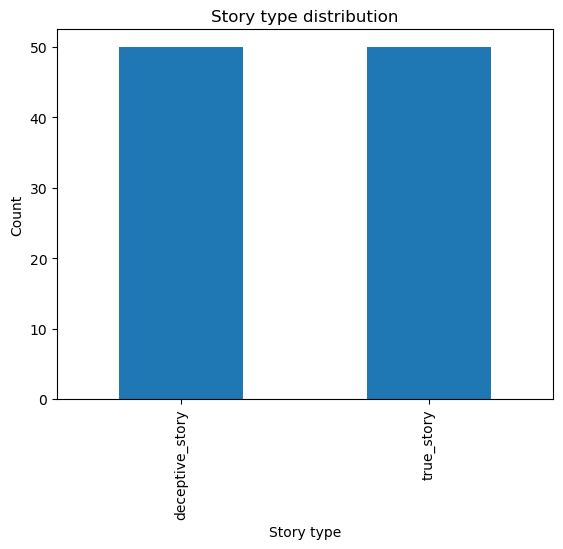

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

audio_directory = Path('/Users/pranavrao/Documents/School/Grad School/DSAI/Machine Learning/Mini Project/Project Files/MLEndDD_stories_small')
metadata_directory = Path('MLEndDD_story_attributes_small.csv')
metadata = pd.read_csv(metadata_directory)

#this function will load the metadata and properly encode the categorial variables
def load_metadata(metadata_directory):
    metadata = pd.read_csv(metadata_directory)
    metadata['encode_storytype'] = metadata['Story_type'].map({'deceptive_story': 0, 'true_story': 1})
    return metadata

#now, i want to visualize the metadata to make sure everything is in order
print("First few rows of the metadata:")
print(metadata.head())  

print("Data types and missing values:")
print(metadata.info())  

print("Summary Stats:")
print(metadata.describe())  

metadata['Story_type'].value_counts().plot(kind='bar')
plt.title('Story type distribution')
plt.xlabel('Story type')
plt.ylabel('Count')
plt.show()

##### Feature Extraction

I've decided to extract Mel-Frequency Cepstral Coefficients (MFCCs), their deltas, chroma features, spectral features, pitch, zero crossing rate, RMS energy, and energy variance. MFCCs can detect changes in articulation that may be present during a lie, and their deltas can calculate rate of change and how quickly that rate changes, respectively. The deltas can also capture changes in speech patterns or vocal dynamics. I decided to include chroma features because sometimes lying can involve the speaker talking at a higher pitch, which is something chroma features may be able to detect. The spectral features are there to detect frequencies, erratic speech, and similar changes in speech patterns that are exhibited during a lie. Then, I capture pitch to detect any irregular patterns or just an increased pitch in general, both of which could indicate a lie. The zero crossing rate is being captured to detect fragmented, noisy speech, or sounds that are made more often during nervous speech. RMS energy captures the average power of the signal, so attempts to over control speech could result in exaggerated patterns here. Finally, energy variance captures the variability of the amplitude over time, since irregular patterns can be indicitive of a lie, whereas more smooth patterns could indicate a truth. 

In [2]:
import librosa

def extract_features(audio_path, sr=16000, duration=30, n_mfcc=13):
    
    y, sr = librosa.load(audio_path, sr=sr, duration=duration)
    
    #i will start by getting MFCCs and their first and second order deltas
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    delta_mfcc = librosa.feature.delta(mfccs)
    delta2_mfcc = librosa.feature.delta(mfccs, order=2)
    
    #now, i will get the chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    
    #now, i will collect some spectral features such as spectral centroid, bandwidth, contrast, flatness, and rolloff
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_flatness = librosa.feature.spectral_flatness(y=y)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    
    #now, additional features like pitch, zero crossing rate, RMS energy, and energy variance 
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    f0 = np.nan_to_num(f0)  # Replace NaNs with zeros
    zcr = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    energy_variance = np.var(y)
    
    #this part will combine all the features calculated above into a single array
    combined_features = np.hstack([
        np.mean(mfccs, axis=1), np.std(mfccs, axis=1),
        np.mean(delta_mfcc, axis=1), np.std(delta_mfcc, axis=1),
        np.mean(delta2_mfcc, axis=1), np.std(delta2_mfcc, axis=1),
        np.mean(chroma, axis=1), np.std(chroma, axis=1),
        np.mean(spectral_centroid, axis=1), np.std(spectral_centroid, axis=1),
        np.mean(spectral_bandwidth, axis=1), np.std(spectral_bandwidth, axis=1),
        np.mean(spectral_contrast, axis=1), np.std(spectral_contrast, axis=1),
        np.mean(spectral_flatness, axis=1), np.std(spectral_flatness, axis=1),
        np.mean(spectral_rolloff, axis=1), np.std(spectral_rolloff, axis=1),
        np.mean(f0), np.std(f0),
        np.mean(zcr), np.std(zcr),
        np.mean(rms), np.std(rms),
        energy_variance
    ])
    return combined_features

##### Dataset Preparation

This function will iterate through all of the audio files and extract their features, as described in the extract_features function above. Then, it will output 2 NumPy arrays: one for features and one for labels.

In [3]:
def prepare_dataset(metadata, audio_directory):
    features = []
    labels = []
    for index, row in metadata.iterrows():
        filename = audio_directory / row['filename']
        if filename.exists():
            feature_vector = extract_features(filename)
            if feature_vector is not None:
                features.append(feature_vector)
                labels.append(row['encode_storytype'])
            else:
                print(f"Error encountered while parsing file: {filename}")
        else:
            print(f"File does not exist: {filename}")
    print(f"Total features extracted: {len(features)}")
    print(f"Total labels collected: {len(labels)}")
    
    return np.array(features), np.array(labels)

# 6 Experiments and results

##### Model Training using SVM and k-fold Cross Validation

In this step, I will train the model. I've decided to use a SVM model with k-fold cross validation. I've also decided to utilize Principal Component Analysis (PCA) to reduce the dimensionality of the features as its going into the model. In this step, I've also taken steps to normalize the data to a mean of 0 and standard deviation of 1 using StandardScaler(). This way, I can make sure every feature contributes equally to the model since SVM models can be sensitive to this. I will also be doing some hyperparameter tuning using GridSearchCV so I can find the overall optimal set of hyperparameters to train the model on.

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def train_svm_with_kfold(X, y, apply_pca=True, n_components=0.95, n_splits=5):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    if apply_pca:
        pca = PCA(n_components=n_components)
        X_scaled = pca.fit_transform(X_scaled)
    
    #for hyperparameter tuning, i start by defining the parameter grid
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    }
    
    #then, i initialize the SVM model and the grid search
    svm = SVC(random_state=42)
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
    
    #now, i will setup the k-fold cross-validation and evaluate the model
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_results = cross_val_score(grid_search, X_scaled, y, cv=kfold, scoring='accuracy')
    
    print(f"K-fold cross-validation results: {cv_results}")
    print(f"Mean accuracy: {cv_results.mean()}")
    print(f"Standard deviation: {cv_results.std()}")
    
    #once cross validation is complete, i can retrieve the model with the best hyperparameters and fit the model on the entire dataset
    grid_search.fit(X_scaled, y)
    best_model = grid_search.best_estimator_
    
    return best_model, scaler, pca if apply_pca else None

##### Model Evaluation

Now that I have a trained model, I'm going to write a function below that will evaluate model performance using metrics like accuracy, precision, recall, F1 score, AUC-ROC, and a confusion matrix. The accuracy will calculate the overall proportion of correct predictions, precision will calculate how many predicted positives are true positives, recall will show many true positives are correctly predicted, and F1 score will show the mean of the precision and recall scores. The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) will show how well the model separates the classes, with 0.5 meaning basically random guesses and 1.0 meaning perfect discrimination between classes. Finally, I'm generating a confusion matrix to visualize the number of true positives and negatives, but also false postives and false negatives. I thought it to be important that I generate more than just an accuracy metric, as accuracies do not always tell the full picture and can be misleading if not interpreted in the right context. 

In [5]:
def evaluate_model(model, scaler, X, y, pca=None):
    X_scaled = scaler.transform(X)
    
    if pca:
        X_scaled = pca.transform(X_scaled)
    
    #generate the predictions based on the model so that i can compare them with the true labels
    y_pred = model.predict(X_scaled)
    print("Classification Report: ", classification_report(y, y_pred))
    print("Accuracy: ", accuracy_score(y, y_pred))
    
    auc = roc_auc_score(y, model.decision_function(X_scaled))
    print("AUC-ROC: ", auc)
    

    confusion_matrix = ConfusionMatrixDisplay.from_estimator(model, X_scaled, y)
    confusion_matrix.plot()

##### Running the Model

Extracting features...
Total features extracted: 100
Total labels collected: 100
Training SVM model with K-fold cross-validation...
K-fold cross-validation results: [0.5  0.55 0.45 0.5  0.4 ]
Mean accuracy: 0.48
Standard deviation: 0.050990195135927854
Evaluate SVM model on the entire dataset...
Classification Report:                precision    recall  f1-score   support

           0       0.87      0.78      0.82        50
           1       0.80      0.88      0.84        50

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100

Accuracy:  0.83
AUC-ROC:  0.8796


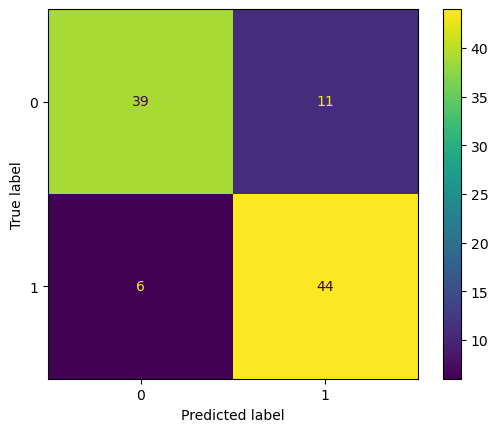

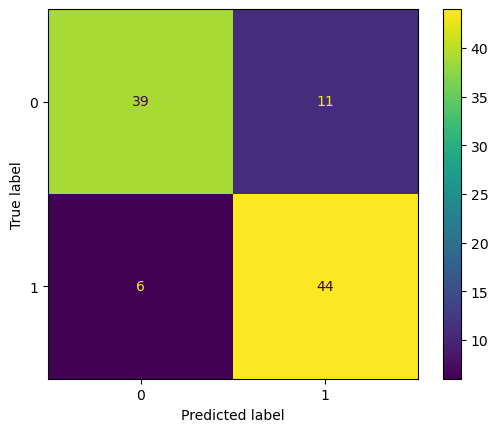

In [6]:
#finally, i compile all of the functions above into a single main function that runs the entire pipeline
def main(metadata_directory, audio_directory, apply_pca=True, n_components=0.95, n_splits=5):
    metadata = load_metadata(metadata_directory)

    print("Extracting features...")
    features, labels = prepare_dataset(metadata, audio_directory)

    if len(features) == 0 or len(labels) == 0:
        print("No features or labels extracted. Exiting.")
        return None, None

    print("Training SVM model with K-fold cross-validation...")
    svm_model, svm_scaler, pca = train_svm_with_kfold(features, labels, apply_pca=apply_pca, n_components=n_components, n_splits=n_splits)

    print("Evaluate SVM model on the entire dataset...")
    evaluate_model(svm_model, svm_scaler, features, labels, pca=pca)

    return svm_model, svm_scaler, pca

#call the function to run the entire pipeline
svm_model, svm_scaler, pca = main(metadata_directory, audio_directory, apply_pca=True, n_components=0.95, n_splits=5)

# 7 Conclusions

The goal of this project was to be able to take a 30 second audio recording and determine whether or not it was a true story or a deception. To accomplish this, I extracted audio features from the dataset, trained it on a SVM model with stratified k-fold cross validation, and evaluated the model using accuracy, precision, recall, F1 score, AUC-ROC, and a confusion matrix. I achieved an accuracy of 0.83, AUC-ROC of 0.8796, precision weighted average of 0.83, recall weighted average of 0.83, mean accuracy of 0.48, and F1 score weighted average of 0.83. The confusion matrix showed that 44 stories were true and were also predicted as true, 11 stories were predicted true but were actually false, 6 stories were predicted false but were actually true, and 39 stories were predicted false that were actually false. 

The results show that this model is okay, but not great at delineating between true and deceptive stories. However, there are some limitations and places for improvement to consider. The first major limitation is that I was working with a dataset consisting of only 100 recorded audio samples that were already fairly uniform to begin with, due to the nature of the clear instructions for recording them. Therefore, it remains to be seen how this model will perform with a larger, potentially more diverse dataset. Another thing to point out is this model has not yet been tested on new, unseen data. Until it is, there is no way to tell how effective this model really is. In addition, the features I used, while useful for this project, were not comprehensive. The usage of additional features like prosodic features or linguistic content may help with the performance of this model. Finally, while PCA and hyperparameter tuning were used to reduce overfitting, due to the small size of the dataset, I cannot be confident that the overfitting problem is eliminated completely. Once again, until the model is tested with new, unseen data, I won't be able to tell for sure. 

Now that I have covered some limitations, I'll point out some ideas for improvement. The first, and perhaps most obvious one, is to increase the size of the dataset. I could have also augmented the size of the given dataset. When it comes to feature extraction, I could have explored some prosodic features like speaking rate, pause duration, etc. I also could have used Natural Language Processing (NLP) to extract linguistic features. Another major area of improvement is with ensemble approaches, of which I did not use any. I could have utilized Random Forest or Gradient Boosting to compare against the SVM model I used in this project. Finally, perhaps combining audio features with visual features like facial expressions or body language could result in a lie detection model that remains non-invasive but is perhaps more robust than one purely dependent on audio features.

If these limitations are addressed and improvements are implemented, this lie detection tool certainly has many applications in the real world such as forensic analysis, automated fact-checking, content validation, security, psychology, and much more. 

# 8 References

[1] W. McKinney, "Data Structures for Statistical Computing in Python," in Proceedings of the 9th Python in Science Conference, 2010, pp. 51–56.

[2] C. R. Harris et al., "Array programming with NumPy," Nature, vol. 585, no. 7825, pp. 357–362, 2020.

[3] Python Software Foundation, "Pathlib — Object-Oriented Filesystem Paths," [Online]. Available: https://docs.python.org/3/library/pathlib.html. [Accessed: Dec. 3, 2024].

[4] B. McFee et al., "librosa: Audio and Music Signal Analysis in Python," in Proceedings of the 14th Python in Science Conference, 2015, pp. 18–25.

[5] F. Pedregosa et al., "Scikit-learn: Machine Learning in Python," Journal of Machine Learning Research, vol. 12, pp. 2825–2830, 2011.

[6] H. X. Coe, “Uncovering the Real Voice: How to Detect and Verify Audio Deepfakes,” Medium, Oct. 2021. [Online]. Available: https://medium.com/htx-s-s-coe/uncovering-the-real-voice-how-to-detect-and-verify-audio-deepfakes-42e480d3f431. [Accessed: Dec. 3, 2024].

[7] “How to Detect Lies: Microexpressions,” Medium, [Online]. Available: https://medium.com/@101/how-to-detect-lies-microexpressions-b17ae1b1181e. [Accessed: Dec. 3, 2024].

[8] “How to Detect Lies: Speech,” Medium, [Online]. Available: https://medium.com/@101/how-to-detect-lies-speech-346353a8d36c#.cqa388iye. [Accessed: Dec. 3, 2024].

[9] M. Alharbi, A. J. Aldosari, M. Alsini, et al., “Deception detection using speech analysis: A comprehensive review,” International Journal of Artificial Intelligence in Education, vol. 12, no. 1, pp. 1–15, 2024. [Online]. Available: https://www.sciencedirect.com/science/article/pii/S2949719124000050#sec7. [Accessed: Dec. 3, 2024].

[10] A. Xue, “Detecting Deception Using Speech and Behavioral Cues,” Senior Thesis, Princeton University, Spring 2019. [Online]. Available: https://www.cs.princeton.edu/sites/default/files/alice_xue_spring_2019.pdf. [Accessed: Dec. 3, 2024].

[11] “Understanding Deceptive Behaviors Through Voice Analysis,” National Library of Medicine, PubMed Central, 2023. [Online]. Available: https://pmc.ncbi.nlm.nih.gov/articles/PMC9910662/#sec036. [Accessed: Dec. 3, 2024].

[12] M. F. A. Rahman et al., “Speech deception analysis using machine learning,” Journal of Physics: Conference Series, vol. 1921, no. 1, 2021. [Online]. Available: https://iopscience.iop.org/article/10.1088/1742-6596/1921/1/012028/pdf. [Accessed: Dec. 3, 2024].

[13] J. C. Wandemberg, “Humans: The Only Species That Fools Itself,” Medium, 2023. [Online]. Available: https://jcwandemberg.medium.com/humans-the-only-species-that-fools-itself-bdbf798dec5b. [Accessed: Dec. 3, 2024].

[14] A. L. Alan, “Why Humans Evolved to Be Extraordinary Liars,” Medium, 2023. [Online]. Available: https://alan-12169.medium.com/why-humans-evolved-to-be-extraordinary-liars-8461ff82d8b5. [Accessed: Dec. 3, 2024].

[15] “Can Animals Lie?” BBC Wildlife Magazine, [Online]. Available: https://www.discoverwildlife.com/animal-facts/can-animals-lie. [Accessed: Dec. 3, 2024].

[16] Google, "Machine Learning Crash Course," [Online]. Available: https://developers.google.com/machine-learning/crash-course. [Accessed: Dec. 3, 2024].

[17] A. Ng, "Machine Learning," Coursera, [Online]. Available: https://www.coursera.org/learn/machine-learning. [Accessed: Dec. 3, 2024].

[18] "Cross Validation in Machine Learning," GeeksforGeeks, [Online]. Available: https://www.geeksforgeeks.org/cross-validation-machine-learning/#. [Accessed: Dec. 3, 2024].

[19] "Preprocessing the Audio Dataset," GeeksforGeeks, [Online]. Available: https://www.geeksforgeeks.org/preprocessing-the-audio-dataset/?ref=header_outind. [Accessed: Dec. 3, 2024].

[20] "How Can Machine Learning Be Used in Audio Analysis," Towards Data Science, [Online]. Available: https://towardsdatascience.com/how-can-machine-learning-be-used-in-audio-analysis-847ebbefeb6. [Accessed: Dec. 3, 2024].

[21] "Classification in Machine Learning," DataCamp, [Online]. Available: https://www.datacamp.com/blog/classification-machine-learning. [Accessed: Dec. 3, 2024].

[22] "Types of Machine Learning," GeeksforGeeks, [Online]. Available: https://www.geeksforgeeks.org/types-of-machine-learning/. [Accessed: Dec. 3, 2024].

[23] "Support Vector Machine Algorithm," GeeksforGeeks, [Online]. Available: https://www.geeksforgeeks.org/support-vector-machine-algorithm/. [Accessed: Dec. 3, 2024].

[24] "SVM Hyperparameter Tuning using GridSearchCV," GeeksforGeeks, [Online]. Available: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/. [Accessed: Dec. 3, 2024].

[25] R. Nair, "SVM Hyperparameter Tuning," Kaggle, [Online]. Available: https://www.kaggle.com/code/rajeevnair676/svm-hyperparameter-tuning. [Accessed: Dec. 3, 2024].